In [1]:
import keras
import tracker3d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
frame = pd.read_csv("datasets/standard_100MeV.csv")
train, target = tracker3d.loader.dataload(frame, nev=3, tpe=5, ts=4, npe=25)

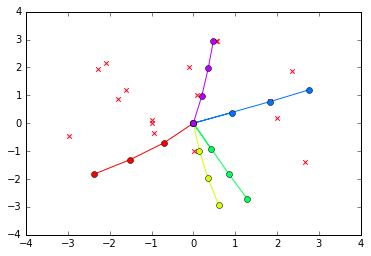

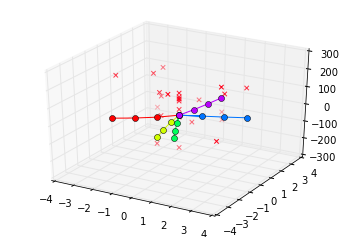

In [3]:
event_number = 1
IDs = tracker3d.utils.from_categorical(target[event_number])
tracker3d.utils.plot2D(train[event_number], IDs)
tracker3d.utils.plot3D(train[event_number], IDs)

In [ ]:
tracker3d.utils.display_side_by_side(train, target, 2)

In [4]:
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

In [5]:
input_shape = train[0].shape # Shape of an event.
output_shape = len(target[0][0]) # Number of tracks per event

batch_size = 32
epochs     = 64
valsplit   = 0.25
opt        = 'rmsprop' # optimizer
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=input_shape, dropout=.2, recurrent_dropout=.2))
model.add(Dense(output_shape, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#tracker.model.summary()

In [6]:
modelpath = 'simple.h5'
hist = model.fit(train, target, epochs=epochs, batch_size=batch_size,
                         verbose=0, validation_split=valsplit,
                         callbacks=[keras.callbacks.ModelCheckpoint(filepath=modelpath, verbose=0)])

In [7]:
predictions = model.predict(train, batch_size=batch_size)

In [ ]:
tracker3d.utils.print_metrics(train, target, predictions)

In [ ]:
tracker3d.utils.display_side_by_side(train, predictions)

In [8]:
event_number = 0
predict_IDs = tracker3d.utils.from_categorical(predictions[event_number])
correct_IDs = tracker3d.utils.from_categorical(target[event_number])

print(predict_IDs)
print(correct_IDs)
#tracker3d.utils.plot3D(train[event_number], predict_IDs)
#tracker3d.utils.plot3D(train[event_number], correct_IDs)

[5 5 5 5 5 0 0 0 0 5 5 1 1 1 1 1 1 1 2 5 5 5 5 5 5 5 5 5 3 3 5 5 5 5 5 5 4
 4 5 5 5 5 5 5 5]
[5 5 5 5 5 0 0 0 0 5 5 1 1 1 1 2 2 2 2 5 5 5 5 5 5 5 3 3 3 3 5 5 5 5 4 4 4
 4 5 5 5 5 5 5 5]
